# E-commerce project

In [1]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
sns.set()


In [2]:
data=pd.read_csv('data.csv',encoding = 'ISO-8859-1')

In [3]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [4]:
data.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      541909 non-null object
StockCode      541909 non-null object
Description    540455 non-null object
Quantity       541909 non-null int64
InvoiceDate    541909 non-null object
UnitPrice      541909 non-null float64
CustomerID     406829 non-null float64
Country        541909 non-null object
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [7]:
data.shape

(541909, 8)

## Data Cleaning 

There are/is a negative value(s) for the variables Quantity and UnitPrice. There are missings for the variable CustomerID. Remove entries with NA for CustomerID and remove entries with negative values for Quantity.

## Remove negative values of Quantity and UnitPrice

In [9]:
data=data[data['Quantity'] > 0] 

In [33]:
data=data[data['UnitPrice'] > 0]

In [11]:
#Verification
data.describe()

,Quantity,UnitPrice,CustomerID
count,531283.000000,531283.000000,397924.000000
mean,10.655299,3.898954,15294.315171
std,156.830617,35.876279,1713.169877
min,1.000000,0.000000,12346.000000
25%,1.000000,1.250000,13969.000000
50%,3.000000,2.080000,15159.000000
75%,10.000000,4.130000,16795.000000
max,80995.000000,13541.330000,18287.000000


## outliers in terms of quantity & price

## Feature engineering

Create new variable Total_Sales gives the total price for each observation

In [13]:
data['TotalSales'] = data['Quantity'] * data['UnitPrice']

Make a datetime variable from the variable InvoiceDate and also make a date variable.

In [15]:
# change the invoice_date format - String to Timestamp format
data['Invoice_Date'] = pd.to_datetime(data.InvoiceDate, format='%m/%d/%Y %H:%M')


In [18]:
# create some useful features ...
data['day']=data.Invoice_Date.dt.day
data['hour']=data.Invoice_Date.dt.hour
data['month']=data.Invoice_Date.dt.month
data['year']=data.Invoice_Date.dt.year

In [27]:
#Only 1 month in 2010
df= data[data.year==2010]
df.month.value_counts()

12    41683
Name: month, dtype: int64

In [29]:
data= data[data.year!=2010]
data.drop(['year'], axis=1, inplace=True)

In [30]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSales,Invoice_Date,day,hour,month
42481,539993,22386,JUMBO BAG PINK POLKADOT,10,1/4/2011 10:00,1.95,13313.0,United Kingdom,19.5,2011-01-04 10:00:00,4,10,1
42482,539993,21499,BLUE POLKADOT WRAP,25,1/4/2011 10:00,0.42,13313.0,United Kingdom,10.5,2011-01-04 10:00:00,4,10,1
42483,539993,21498,RED RETROSPOT WRAP,25,1/4/2011 10:00,0.42,13313.0,United Kingdom,10.5,2011-01-04 10:00:00,4,10,1
42484,539993,22379,RECYCLING BAG RETROSPOT,5,1/4/2011 10:00,2.10,13313.0,United Kingdom,10.5,2011-01-04 10:00:00,4,10,1
42485,539993,20718,RED RETROSPOT SHOPPER BAG,10,1/4/2011 10:00,1.25,13313.0,United Kingdom,12.5,2011-01-04 10:00:00,4,10,1


## Data Visualization

In [ ]:
plt.figure(num=None, figsize=(8, 6))


sns.distplot(heart[heart['sex']==0]['trestbps'], rug=True, hist=True, label='female')
sns.distplot(heart[heart['sex']==1]['trestbps'], rug=True, hist=True, label='male')

plt.legend()
plt.title('Density plot of Resting Blood Pressure by gender');


/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


<Figure size 1440x1440 with 0 Axes>

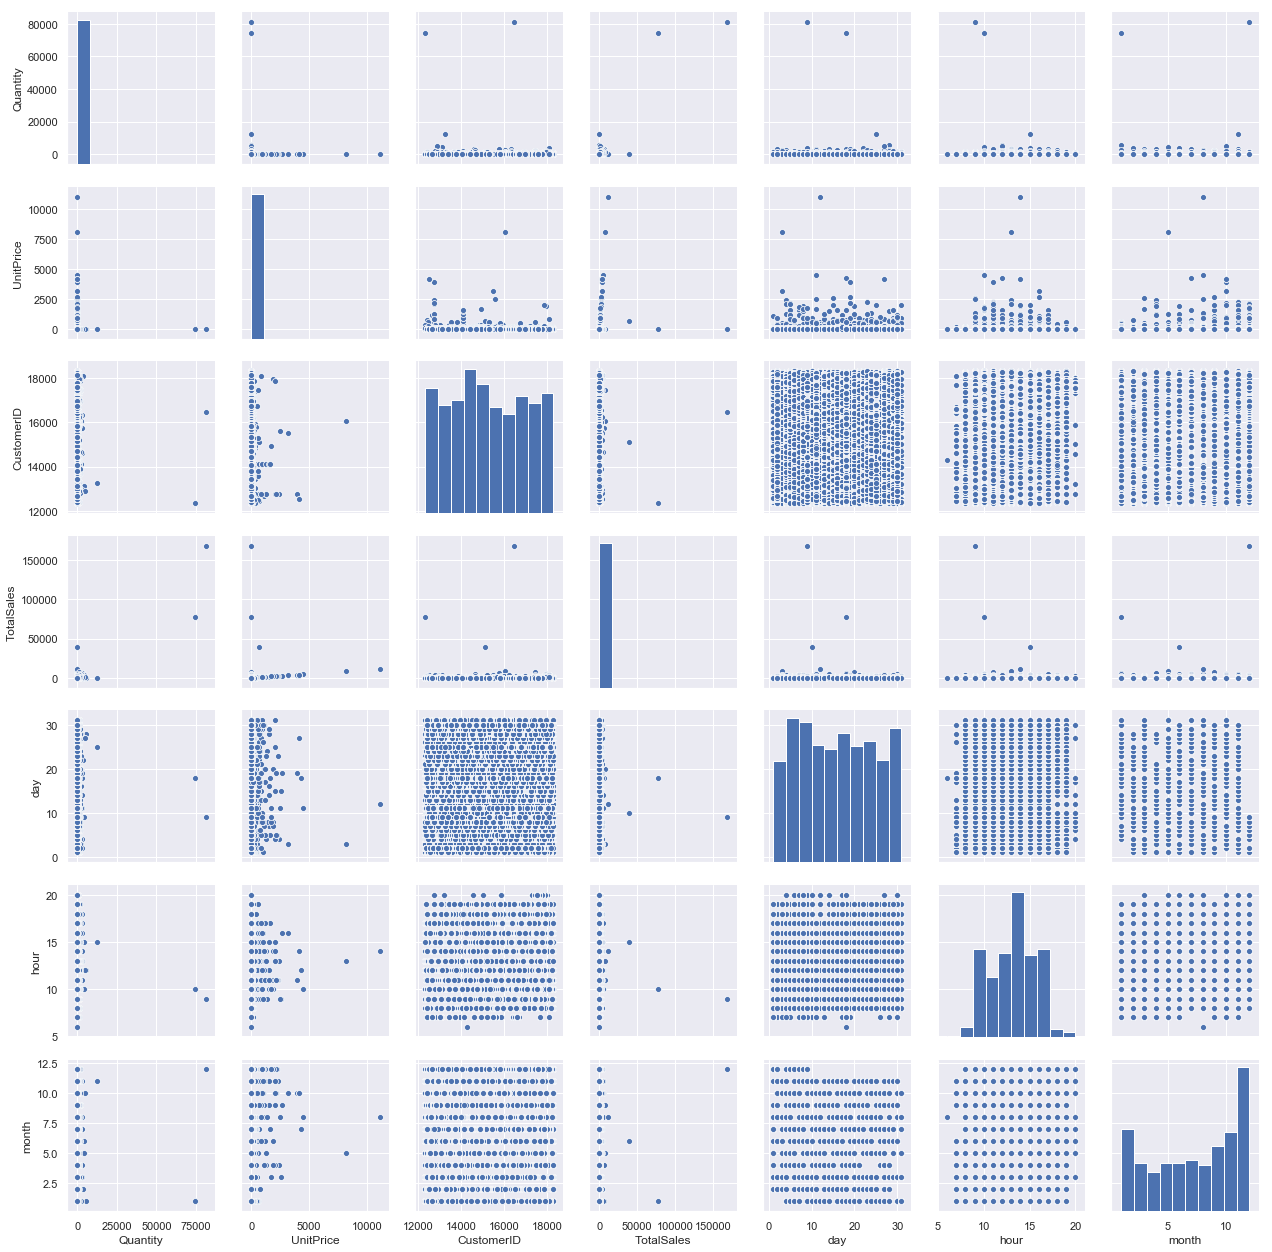

In [31]:
figure = plt.figure(figsize=(20,20))
sns.pairplot(data);
plt.show()